In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [75]:
df = pd.read_csv(r'ds_salaries.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [77]:
df.shape

(607, 11)

In [78]:
count = ['experience_level', 'employment_type', 'remote_ratio', 'company_size']
for i in count:
    print(df[i].value_counts())

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
100    381
0      127
50      99
Name: remote_ratio, dtype: int64
M    326
L    198
S     83
Name: company_size, dtype: int64


In [79]:
def show_barplots(xn, y, df, hue_param=None):
    plt.figure(figsize=(10, 6))
    ax = 0
    if not hue_param:
        ax = sns.barplot(x=xn,
        y='salary_in_usd',
        ci=None,
        data=df)
    else:
        ax = sns.barplot(x=xn,
        y='salary_in_usd',
        ci=None,
        hue=hue_param,
        data=df)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    plt.ylabel("Salaries in USD")
    plt.show()

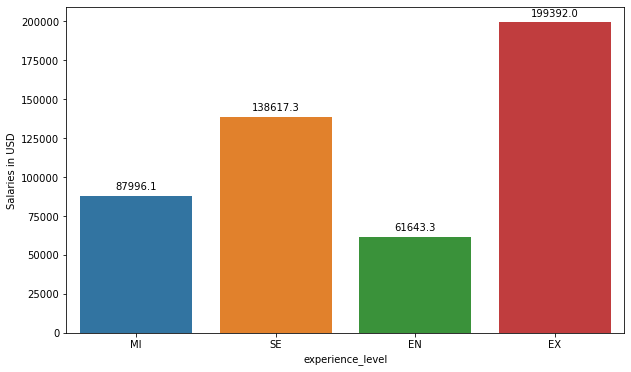

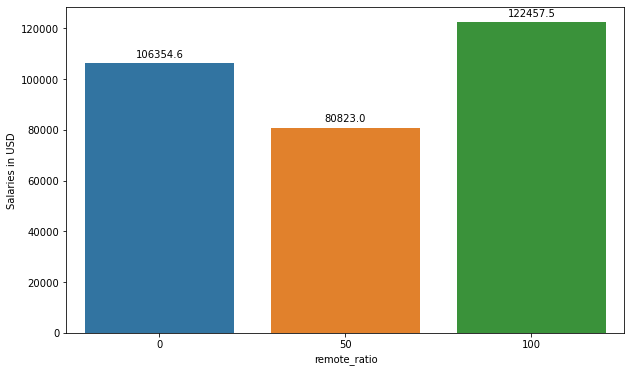

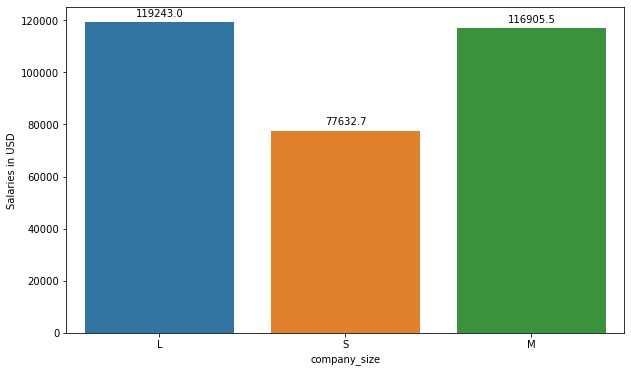

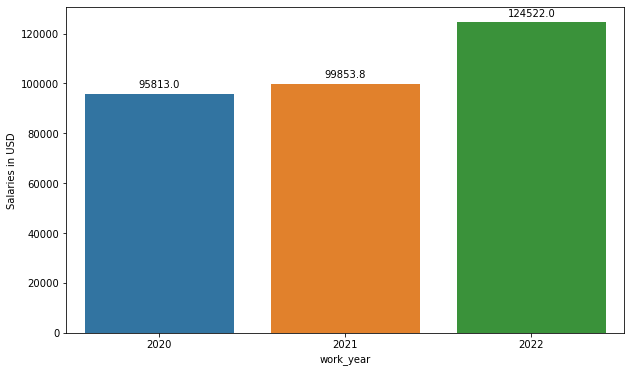

In [80]:
x_axis = ['experience_level', 'remote_ratio', 'company_size', 'work_year']
for x in x_axis:
    show_barplots(x, 'salary_in_usd', df)

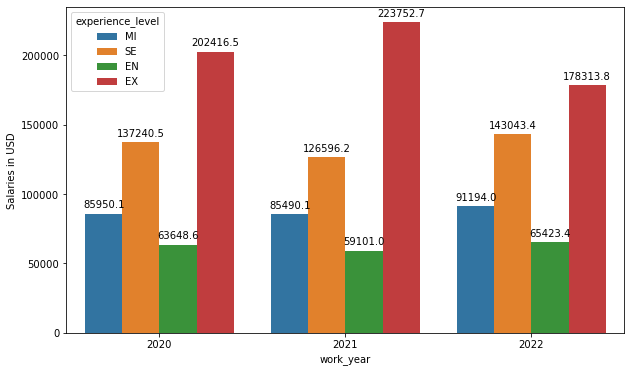

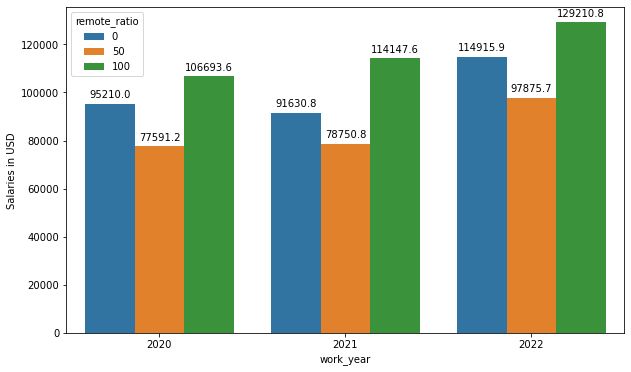

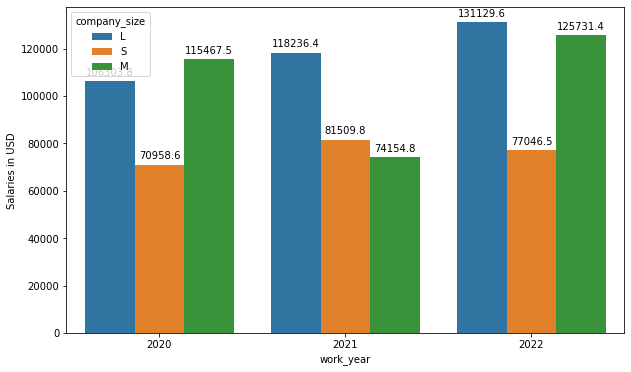

In [81]:
hues = ['experience_level', 'remote_ratio', 'company_size']
for hue in hues:
    show_barplots('work_year', 'salay_in_usd', df, hue)

In [82]:
for x in [2020, 2021, 2022]:
    print(df[df['work_year'] == x]['remote_ratio'].value_counts())

100    36
50     21
0      15
Name: remote_ratio, dtype: int64
100    117
50      66
0       34
Name: remote_ratio, dtype: int64
100    228
0       78
50      12
Name: remote_ratio, dtype: int64


<AxesSubplot:xlabel='salary_in_usd'>

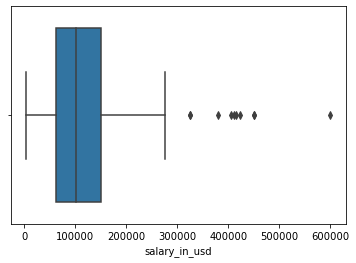

In [83]:
sns.boxplot(x='salary_in_usd', data=df)

In [84]:
quantiles = np.percentile(df['salary_in_usd'], [0, 25, 50, 75, 100])
iqr = quantiles[3] - quantiles[1]
min_bound = quantiles[1] - iqr*1.5
max_bound = quantiles[3] + iqr*1.5
over_indexes = df.loc[df['salary_in_usd'] > max_bound, 'salary_in_usd'].index
if not over_indexes.empty:
    df.loc[over_indexes, 'salary_in_usd'] = max_bound
under_indexes = df.loc[df['salary_in_usd'] < min_bound, 'salary_in_usd'].index
if not under_indexes.empty:
    df.loc[under_indexes, 'salary_in_usd'] = min_bound

<AxesSubplot:xlabel='salary_in_usd'>

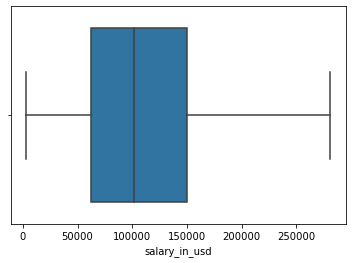

In [85]:
sns.boxplot(x='salary_in_usd', data=df)

In [86]:
import pickle

In [87]:
le = LabelEncoder()
categories = ['experience_level', 'remote_ratio', 'company_size']
end_df = df.copy()
for i in categories:
    le.fit(end_df[i])
    end_df[i] = le.transform(end_df[i])

In [88]:
end_df = end_df[['experience_level', 'remote_ratio', 'company_size', 'salary_in_usd']]

In [89]:
end_df

,experience_level,remote_ratio,company_size,salary_in_usd
0,2,0,0,79833
1,3,0,2,260000
2,3,1,1,109024
3,2,0,2,20000
4,3,1,0,150000
...,...,...,...,...
602,3,2,1,154000
603,3,2,1,126000
604,3,0,1,129000
605,3,2,1,150000


In [90]:
x = end_df[categories].values
y = end_df['salary_in_usd'].values

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
depth = [x for x in range(12)]
depth.append(None)
criterion = [x for x in range(30)]
neighbors = [x for x in range(30)]

In [93]:
rfr_params = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': depth,
    'max_features': ['sqrt', 'log2', None] 
}
dtr_params = {
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
    'max_depth': depth,
    'max_features': ['sqrt', 'log2', None, 'auto']
}
knn_params = {
    'n_neighbors': neighbors,
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'kd_tree', 'ball_tree', 'brute']
}

In [94]:
rfr_grid = GridSearchCV(RandomForestRegressor(), param_grid=rfr_params, cv=5)
dtr_grid = GridSearchCV(DecisionTreeRegressor(), param_grid=dtr_params, cv=5)
knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid=knn_params, cv=5)

In [95]:
import time
grids = [rfr_grid, dtr_grid, knn_grid]
models = ['RandomForestRegressor', 'DecisionTreeRegressor', 'KNeighborsRegressor']
for i in grids:
    start = time.time()
    i.fit(x_train, y_train)
    end = time.time()
    print(f'Time required to tune hyperparameters for model is {round(end-start, 2)} seconds')

/home/azamat/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 585.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/azamat/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/azamat/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 442, in fit
    trees = Parallel(
  File "/home/azamat/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/joblib/parallel.py", line 1043

Time required to tune hyperparameters for model is 83.33 seconds


/home/azamat/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 1040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/home/azamat/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/azamat/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/home/azamat/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 306,

Time required to tune hyperparameters for model is 1.79 seconds
Time required to tune hyperparameters for model is 2.6 seconds


/home/azamat/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/azamat/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/azamat/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neighbors/_regression.py", line 213, in fit
    return self._fit(X, y)
  File "/home/azamat/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neighbors/_

In [96]:
for i in grids:
    print(i.best_params_)

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': None}
{'criterion': 'poisson', 'max_depth': 6, 'max_features': None}
{'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'uniform'}


In [97]:
def regressor(model, x, y):
    y_pred = model.predict(x)
    mae = mean_absolute_error(y_pred, y)
    mse = mean_squared_error(y_pred, y)
    rmse = np.sqrt(mse)
    print(f"MAE score is: {mae}")
    print(f"MSE score is: {mse}")
    print(f"RMSE score is: {rmse}")

In [99]:
for i in range(len(grids)):
    print(f"Score for {models[i]} model")
    regressor(grids[i], x_test, y_test)

Score for RandomForestRegressor model
MAE score is: 37659.41575495548
MSE score is: 2477694354.4126935
RMSE score is: 49776.44377024833
Score for DecisionTreeRegressor model
MAE score is: 37742.058020019605
MSE score is: 2534227918.4221087
RMSE score is: 50341.11558579238
Score for KNeighborsRegressor model
MAE score is: 37584.183480453976
MSE score is: 2462422945.110244
RMSE score is: 49622.80670327147


In [100]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(f"Score for LinearRegression model")
regressor(lr, x_test, y_test)

Score for LinearRegression model
MAE score is: 40647.37928123691
MSE score is: 2707761138.3810134
RMSE score is: 52036.15222497733
